In [2]:
import pandas as pd
import os, warnings, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/H2GTRM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
url = 'UseData/SmartFarm/'
files = os.listdir(url)
# files

In [4]:
df = pd.read_excel(url + files[0], sheet_name='Sheet 1')
df.head()

,시설ID,농가명,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,단동/연동 구분,...,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
0,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df.columns)

84

In [5]:
# 타겟 변수
target_col = ['조사일', '주차', '초장', '엽장', '엽폭', '엽병장', 
              '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']

# 독립 변수 (결측치 95% 이상인 것 제외)
# 텍스트 파일 참조
X_col = ['좌측일중천창 개도', '외부강우', '외부온도', '좌측일중측창 설정온도', '우측일중천창 개도', '좌측일중측창 온도폭' , 
         '우측일중측창 설정온도', '좌측일중천창 온도폭', '외부풍향', '좌측일중천창 설정온도', '우측일중천창 설정온도',
         '내부습도', '내부온도', '우측일중천창 온도폭', '수집일', '우측일중측창 개도', '좌측일중측창 개도', '외부풍속',
         '우측일중측창 온도폭', '외부습도']

X_col.sort()
X_col

['내부습도',
 '내부온도',
 '수집일',
 '외부강우',
 '외부습도',
 '외부온도',
 '외부풍속',
 '외부풍향',
 '우측일중천창 개도',
 '우측일중천창 설정온도',
 '우측일중천창 온도폭',
 '우측일중측창 개도',
 '우측일중측창 설정온도',
 '우측일중측창 온도폭',
 '좌측일중천창 개도',
 '좌측일중천창 설정온도',
 '좌측일중천창 온도폭',
 '좌측일중측창 개도',
 '좌측일중측창 설정온도',
 '좌측일중측창 온도폭']

    이 부분 어떻게 함수화 해서 편하게 불러올 수 있지 않을까?

In [6]:
df[X_col].describe()

,내부습도,내부온도,외부강우,외부습도,외부온도,외부풍속,외부풍향,우측일중천창 개도,우측일중천창 설정온도,우측일중천창 온도폭,우측일중측창 개도,우측일중측창 설정온도,우측일중측창 온도폭,좌측일중천창 개도,좌측일중천창 설정온도,좌측일중천창 온도폭,좌측일중측창 개도,좌측일중측창 설정온도,좌측일중측창 온도폭
count,3061.000000,3061.000000,3060.000000,3060.000000,3530.000000,3060.000000,3060.000000,2944.000000,2926.000000,2917.0,2957.000000,2930.000000,2917.0,2935.000000,2926.000000,2917.0,2947.000000,2930.000000,2917.0
mean,68.248487,19.221447,0.945196,79.169154,11.610031,1.046428,190.616791,20.557813,9.819699,9.0,39.655276,9.199498,9.0,20.553833,9.822382,9.0,35.062168,9.179696,9.0
std,18.003992,5.157218,0.196780,19.063016,8.493683,1.066890,85.680473,33.027686,2.252892,0.0,41.836354,1.085007,0.0,32.988029,2.257884,0.0,40.956706,1.040469,0.0
min,17.500000,9.000000,0.000000,15.500000,-11.750000,0.000000,1.000000,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
25%,55.670000,15.000000,1.000000,63.647500,5.270000,0.080000,121.060000,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
50%,75.500000,18.920000,1.000000,89.580000,12.000000,0.830000,199.420000,0.000000,9.000000,9.0,24.860000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
75%,82.000000,23.080000,1.000000,95.000000,18.330000,1.580000,265.710000,40.000000,9.000000,9.0,80.000000,9.000000,9.0,38.915000,9.000000,9.0,73.000000,9.000000,9.0
max,92.000000,35.750000,1.000000,95.000000,34.000000,6.250000,339.000000,100.000000,18.000000,9.0,100.000000,18.000000,9.0,100.000000,18.000000,9.0,100.000000,18.000000,9.0


In [7]:
for i in range(len(target_col)):
    X_col.append(target_col[i])
X_col

['내부습도',
 '내부온도',
 '수집일',
 '외부강우',
 '외부습도',
 '외부온도',
 '외부풍속',
 '외부풍향',
 '우측일중천창 개도',
 '우측일중천창 설정온도',
 '우측일중천창 온도폭',
 '우측일중측창 개도',
 '우측일중측창 설정온도',
 '우측일중측창 온도폭',
 '좌측일중천창 개도',
 '좌측일중천창 설정온도',
 '좌측일중천창 온도폭',
 '좌측일중측창 개도',
 '좌측일중측창 설정온도',
 '좌측일중측창 온도폭',
 '조사일',
 '주차',
 '초장',
 '엽장',
 '엽폭',
 '엽병장',
 '엽수',
 '관부직경',
 '화방 꽃수(소화수)',
 '착과수',
 '최종화방차수']

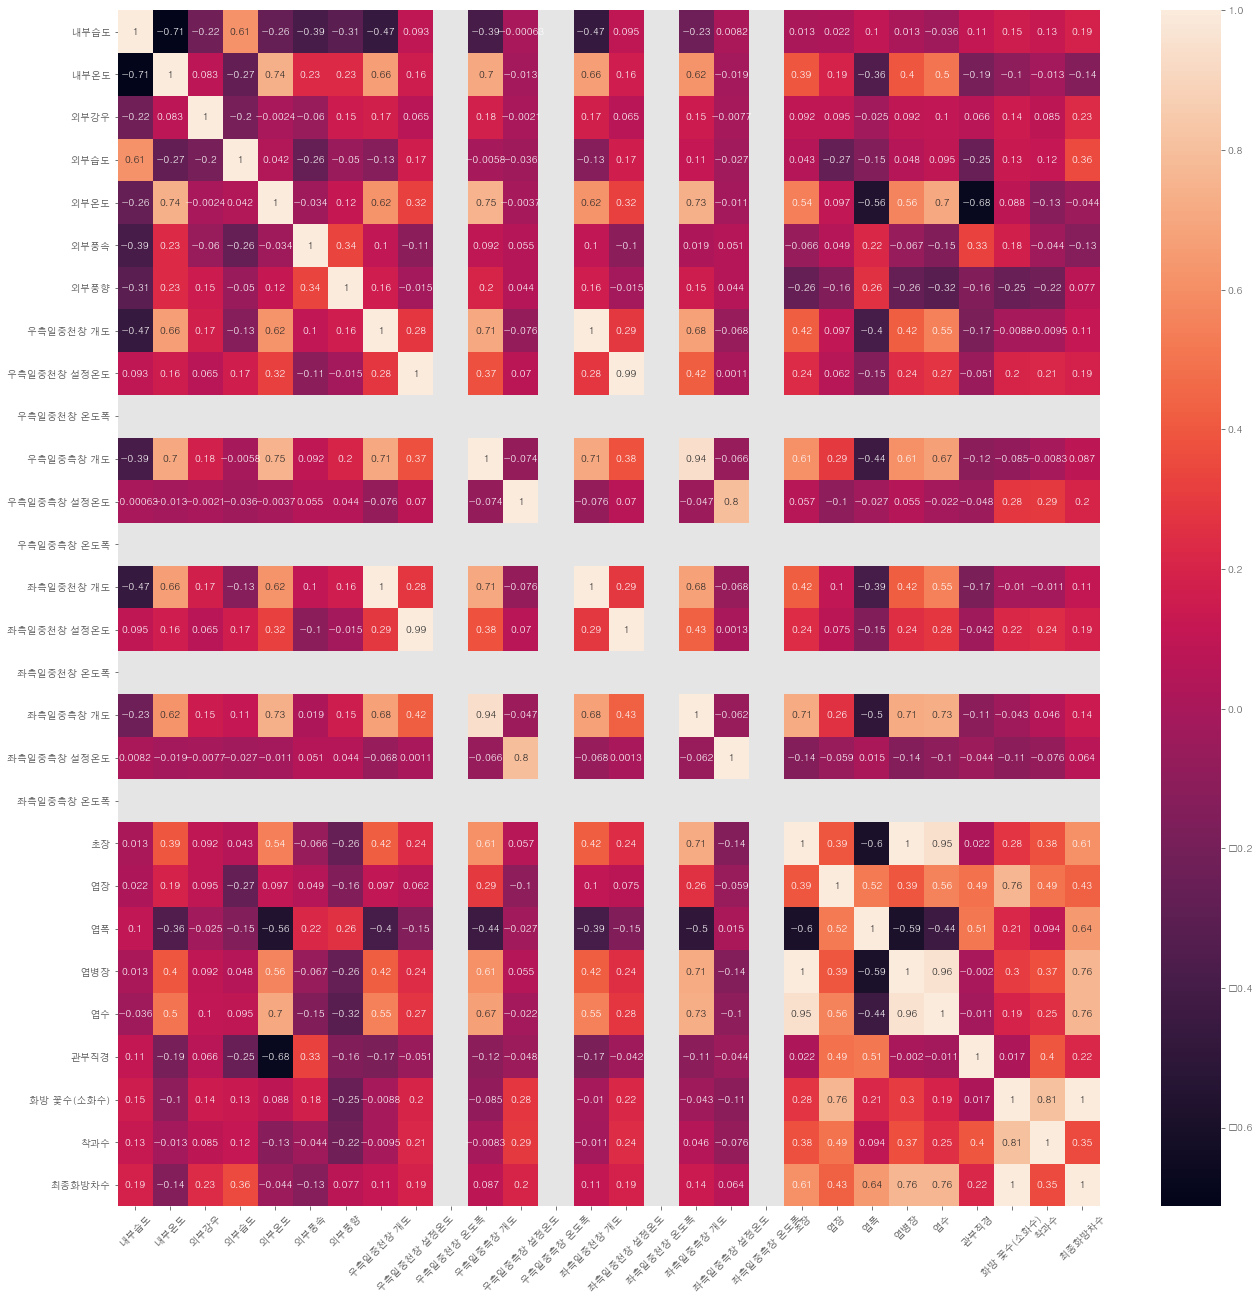

In [13]:
plt.figure(figsize=(22, 22))
# heatMap = sns.heatmap(data=df[sorted(X_col+target_col)].corr(), annot=True) #, cmap='Blues')
heatMap = sns.heatmap(data=df[X_col].corr(), annot=True)
heatMap.set_xticklabels(heatMap.get_xticklabels(), rotation=45)
plt.show()

In [8]:
df[X_col].isnull().sum()

내부습도            472
내부온도            472
수집일               0
외부강우            473
외부습도            473
외부온도              3
외부풍속            473
외부풍향            473
우측일중천창 개도       589
우측일중천창 설정온도     607
우측일중천창 온도폭      616
우측일중측창 개도       576
우측일중측창 설정온도     603
우측일중측창 온도폭      616
좌측일중천창 개도       598
좌측일중천창 설정온도     607
좌측일중천창 온도폭      616
좌측일중측창 개도       586
좌측일중측창 설정온도     603
좌측일중측창 온도폭      616
조사일            3075
주차             3075
초장             3099
엽장             3147
엽폭             3147
엽병장            3099
엽수             3125
관부직경           3123
화방 꽃수(소화수)     3341
착과수            3243
최종화방차수         3437
dtype: int64

In [11]:
len(df['우측일중천창 온도폭']), df['우측일중천창 온도폭'].isnull().sum()

(3533, 616)

In [14]:
df[X_col].corr()

,내부습도,내부온도,외부강우,외부습도,외부온도,외부풍속,외부풍향,우측일중천창 개도,우측일중천창 설정온도,우측일중천창 온도폭,...,좌측일중측창 온도폭,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
내부습도,1.000000,-0.712590,-0.218800,0.613655,-0.263299,-0.387747,-0.305475,-0.469831,0.093251,NaN,...,NaN,0.013197,0.021735,0.100039,0.013128,-0.036048,0.108669,0.154894,0.127652,0.189661
내부온도,-0.712590,1.000000,0.083496,-0.272536,0.736796,0.228772,0.229400,0.661424,0.155951,NaN,...,NaN,0.394076,0.191380,-0.356919,0.395206,0.503456,-0.194525,-0.101672,-0.012776,-0.143621
외부강우,-0.218800,0.083496,1.000000,-0.196011,-0.002441,-0.059975,0.145257,0.172372,0.065163,NaN,...,NaN,0.092193,0.094985,-0.024906,0.092224,0.100196,0.065822,0.144411,0.084582,0.231653
외부습도,0.613655,-0.272536,-0.196011,1.000000,0.042299,-0.260841,-0.050316,-0.131454,0.167110,NaN,...,NaN,0.043441,-0.269931,-0.145541,0.047758,0.095122,-0.251071,0.131051,0.116297,0.357133
외부온도,-0.263299,0.736796,-0.002441,0.042299,1.000000,-0.033769,0.120009,0.618767,0.315688,NaN,...,NaN,0.543290,0.096935,-0.564186,0.559611,0.704605,-0.675834,0.088090,-0.127899,-0.043843
외부풍속,-0.387747,0.228772,-0.059975,-0.260841,-0.033769,1.000000,0.336056,0.100576,-0.105391,NaN,...,NaN,-0.066338,0.049135,0.219807,-0.066802,-0.154932,0.328867,0.175312,-0.043559,-0.134975
외부풍향,-0.305475,0.229400,0.145257,-0.050316,0.120009,0.336056,1.000000,0.160617,-0.015351,NaN,...,NaN,-0.260010,-0.155930,0.258647,-0.258643,-0.315501,-0.155498,-0.251972,-0.216562,0.076585
우측일중천창 개도,-0.469831,0.661424,0.172372,-0.131454,0.618767,0.100576,0.160617,1.000000,0.283318,NaN,...,NaN,0.422942,0.097241,-0.396449,0.424415,0.547143,-0.171243,-0.008818,-0.009525,0.114907
우측일중천창 설정온도,0.093251,0.155951,0.065163,0.167110,0.315688,-0.105391,-0.015351,0.283318,1.000000,NaN,...,NaN,0.236549,0.061707,-0.146595,0.237540,0.271047,-0.050910,0.203420,0.213406,0.189757
우측일중천창 온도폭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


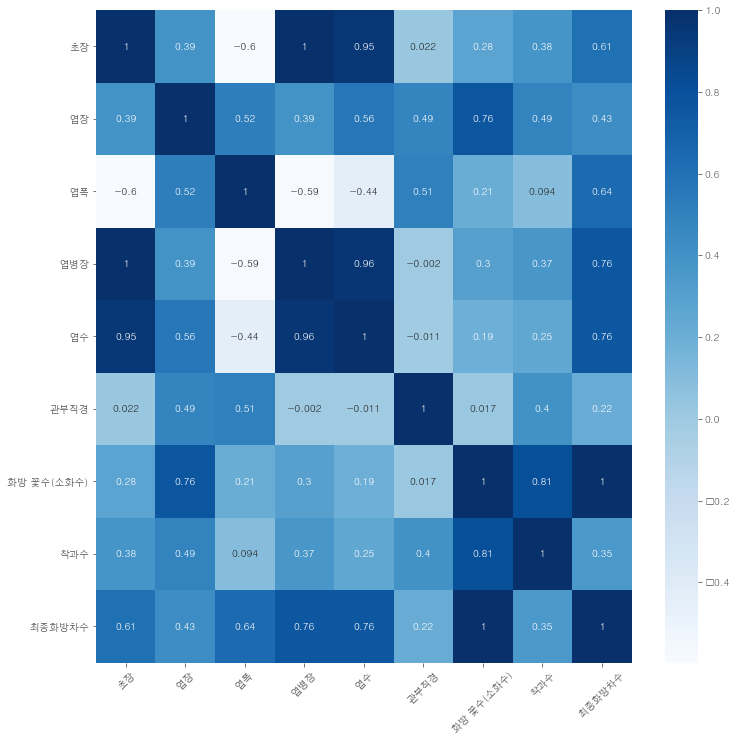

In [17]:
plt.figure(figsize=(12, 12))
# heatMap = sns.heatmap(data=df[sorted(X_col+target_col)].corr(), annot=True) #, cmap='Blues')
heatMap = sns.heatmap(data=df[target_col].corr(), annot=True, cmap='Blues')
heatMap.set_xticklabels(heatMap.get_xticklabels(), rotation=45)
plt.show()

    엽수-초장/엽장/엽병장/최종화방차수
    최종화방차수-초장/엽폭/엽병장/엽수
    착과수-화방꽃수(소화수)